In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt


In [ ]:
import os
os.environ['KAGGLE_USERNAME']='ilmanzia'
os.environ['KAGGLE_KEY']='def1b3edd4ae3c156d0590e1f0be07f6'

In [ ]:
! kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

 93% 193M/207M [00:01<00:00, 110MB/s]
100% 207M/207M [00:01<00:00, 127MB/s]


In [ ]:
! unzip covid-face-mask-detection-dataset.zip

Archive:  covid-face-mask-detection-dataset.zip
  inflating: New Masks Dataset/Test/Mask/2070.jpg  
  inflating: New Masks Dataset/Test/Mask/2072.jpg  
  inflating: New Masks Dataset/Test/Mask/2083.jpg  
  inflating: New Masks Dataset/Test/Mask/2085.jpg  
  inflating: New Masks Dataset/Test/Mask/2086.jpg  
  inflating: New Masks Dataset/Test/Mask/2110.jpg  
  inflating: New Masks Dataset/Test/Mask/2113.jpg  
  inflating: New Masks Dataset/Test/Mask/2114.jpeg  
  inflating: New Masks Dataset/Test/Mask/2130.jpg  
  inflating: New Masks Dataset/Test/Mask/2132.jpg  
  inflating: New Masks Dataset/Test/Mask/2135.jpg  
  inflating: New Masks Dataset/Test/Mask/2154.png  
  inflating: New Masks Dataset/Test/Mask/2158.png  
  inflating: New Masks Dataset/Test/Mask/2159.png  
  inflating: New Masks Dataset/Test/Mask/2160.png  
  inflating: New Masks Dataset/Test/Mask/2170.png  
  inflating: New Masks Dataset/Test/Mask/2172.png  
  inflating: New Masks Dataset/Test/Mask/2173.png  
  inflating: Ne

In [ ]:
main_dir = '/content/New Masks Dataset'
train_dir = os.path.join(main_dir,'Train')
test_dir = os.path.join(main_dir,'Test')
valid_dir = os.path.join(main_dir,'Validation')

train_mask_dir = os.path.join(train_dir,'Mask')

train_nomask_dir = os.path.join(train_dir,'Non Mask')

In [ ]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[:10])

train_nomask_names = os.listdir(train_nomask_dir)
print(train_mask_names[:10])

['0040.jpg', '0482.jpg', '0733.jpg', '0317.jpg', '1511.jpg', '1383.jpg', '0976.jpg', '1430.jpg', '0772.jpg', '1159.jpg']
['0040.jpg', '0482.jpg', '0733.jpg', '0317.jpg', '1511.jpg', '1383.jpg', '0976.jpg', '1430.jpg', '0772.jpg', '1159.jpg']


['/content/New Masks Dataset/Train/Mask/0040.jpg', '/content/New Masks Dataset/Train/Mask/0482.jpg', '/content/New Masks Dataset/Train/Mask/0733.jpg', '/content/New Masks Dataset/Train/Mask/0317.jpg', '/content/New Masks Dataset/Train/Mask/1511.jpg', '/content/New Masks Dataset/Train/Mask/1383.jpg', '/content/New Masks Dataset/Train/Mask/0976.jpg', '/content/New Masks Dataset/Train/Mask/1430.jpg', '/content/New Masks Dataset/Train/Mask/0772.jpg', '/content/New Masks Dataset/Train/Mask/1159.jpg']
['/content/New Masks Dataset/Train/Non Mask/160.jpg', '/content/New Masks Dataset/Train/Non Mask/300.jpg', '/content/New Masks Dataset/Train/Non Mask/102.jpg', '/content/New Masks Dataset/Train/Non Mask/168.jpg', '/content/New Masks Dataset/Train/Non Mask/239.jpg', '/content/New Masks Dataset/Train/Non Mask/174.jpg', '/content/New Masks Dataset/Train/Non Mask/36.jpg', '/content/New Masks Dataset/Train/Non Mask/319.jpg', '/content/New Masks Dataset/Train/Non Mask/207.jpg', '/content/New Masks Da

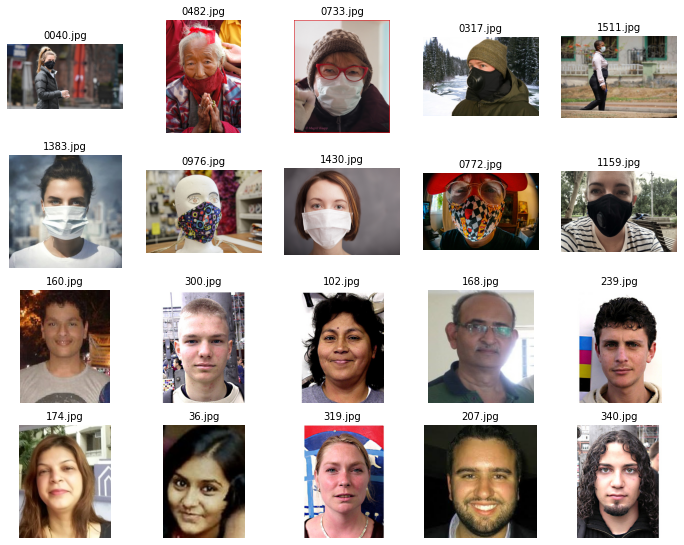

In [ ]:
import matplotlib.image as mpimg
nrows = 5
ncols = 5
plt.figure(figsize=(12,12))

mask_pic = []
for i in train_mask_names[0:10]:
  mask_pic.append(os.path.join(train_mask_dir,i))

nomask_pic = []
for i in train_nomask_names[0:10]:
  nomask_pic.append(os.path.join(train_nomask_dir,i))

print(mask_pic)
print(nomask_pic)

merged_list = mask_pic+nomask_pic

for i in range(0,len(merged_list)):
  data = merged_list[i].split('/',5)[5]
  sp = plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  image = mpimg.imread(merged_list[i])
  sp.set_title(data,fontsize=10)
  plt.imshow(image,cmap='gray')

plt.show()

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,zoom_range=0.2,rotation_range=40,horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=32,class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir,target_size=(150,150),batch_size=32,class_mode='binary')

valid_generator = validation_datagen.flow_from_directory(valid_dir,target_size=(150,150),batch_size=32,class_mode='binary')



Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [ ]:
train_generator.image_shape

(150, 150, 3)

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

In [ ]:
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,epochs=30,validation_data=valid_generator)

Epoch 1/30
19/19 [==============================] - 19s 637ms/step - loss: 5.5238 - accuracy: 0.5068 - val_loss: 0.6821 - val_accuracy: 0.5033
Epoch 2/30
19/19 [==============================] - 12s 638ms/step - loss: 0.6400 - accuracy: 0.6182 - val_loss: 0.5199 - val_accuracy: 0.8954
Epoch 3/30
19/19 [==============================] - 12s 636ms/step - loss: 0.4326 - accuracy: 0.8176 - val_loss: 0.3077 - val_accuracy: 0.8856
Epoch 4/30
19/19 [==============================] - 12s 636ms/step - loss: 0.3742 - accuracy: 0.8593 - val_loss: 0.3836 - val_accuracy: 0.8627
Epoch 5/30
19/19 [==============================] - 12s 642ms/step - loss: 0.3272 - accuracy: 0.8615 - val_loss: 0.2572 - val_accuracy: 0.9085
Epoch 6/30
19/19 [==============================] - 12s 637ms/step - loss: 0.2330 - accuracy: 0.9043 - val_loss: 0.2911 - val_accuracy: 0.8922
Epoch 7/30
19/19 [==============================] - 12s 640ms/step - loss: 0.2870 - accuracy: 0.9009 - val_loss: 0.2536 - val_accuracy: 0.9216

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

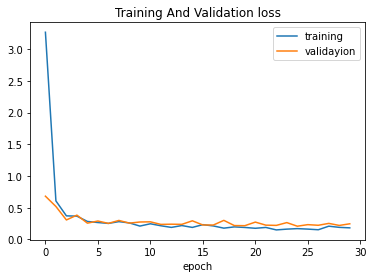

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validayion'])
plt.title('Training And Validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

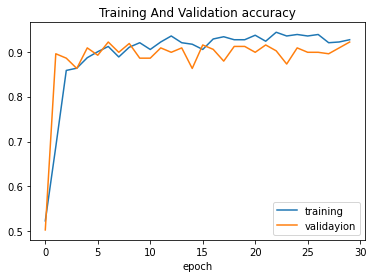

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validayion'])
plt.title('Training And Validation accuracy')
plt.xlabel('epoch')

In [ ]:
test_loss , test_acc = model.evaluate(test_generator)
print('test loss:{} test acc:{}'.format(test_loss,test_acc))

4/4 [==============================] - 1s 296ms/step - loss: 0.2436 - accuracy: 0.9300
test loss:0.24360929429531097 test acc:0.9300000071525574


In [ ]:
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for fname in uploaded.keys():
  img_path = '/content/'+ fname
  img = image.load_img(img_path,target_size=(150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(fname)
  if prediction == 0:
    print('masked')
  else:
    print('no mask')


Saving 121.jpg to 121 (1).jpg
Saving 123.jpg to 123.jpg
121.jpg
no mask
123.jpg
masked


In [ ]:
model.save('model.h5')